Website Data Analysis Project  


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('data.csv')

DATA CLEANING


In [81]:
# Top 5 rows
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


Step 1: Copy column names from first row.  
Step 2:  Drop the first row and reset index.  
Step 3: Rename columns accordingly.

In [82]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop = True)
df.columns = ["Channel Group", "Date-Hour", "Users", "Session", "Engaged Session", "Average engagement time per session", "Engaged sessions per user", "Events per session",	"Engagement rate",	"Event count"]
df.head()

,Channel Group,Date-Hour,Users,Session,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [83]:
# Check data type + null vaues of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   Date-Hour                            3182 non-null   object
 2   Users                                3182 non-null   object
 3   Session                              3182 non-null   object
 4   Engaged Session                      3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [84]:
# Convert date-hour column datatype to datetime

df["Date-Hour"] = pd.to_datetime(df["Date-Hour"], format="%Y%m%d%H", errors='coerce')
df.head()

,Channel Group,Date-Hour,Users,Session,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   Date-Hour                            3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   object        
 3   Session                              3182 non-null   object        
 4   Engaged Session                      3182 non-null   object        
 5   Average engagement time per session  3182 non-null   object        
 6   Engaged sessions per user            3182 non-null   object        
 7   Events per session                   3182 non-null   object        
 8   Engagement rate                      3182 non-null   object        
 9   Event count                          3182 non-null   object        
dtypes: datetime6

In [86]:
# Convert other column to numeric data type

numeric_columns = ["Users", "Session", "Engaged Session", "Events per session", "Average engagement time per session", "Engaged sessions per user", "Engagement rate", "Event count"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   Date-Hour                            3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Session                              3182 non-null   int64         
 4   Engaged Session                      3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
dtypes: datetime6

In [87]:
df["Hour"] = df["Date-Hour"].dt.hour
df.head()

,Channel Group,Date-Hour,Users,Session,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   Date-Hour                            3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Session                              3182 non-null   int64         
 4   Engaged Session                      3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [89]:
# to gain basic info about the data
df.describe()

,Date-Hour,Users,Session,Engaged Session,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


**Q1. What patterns or trends can you observe in website sessions and users over
time?  
Session and User over time**

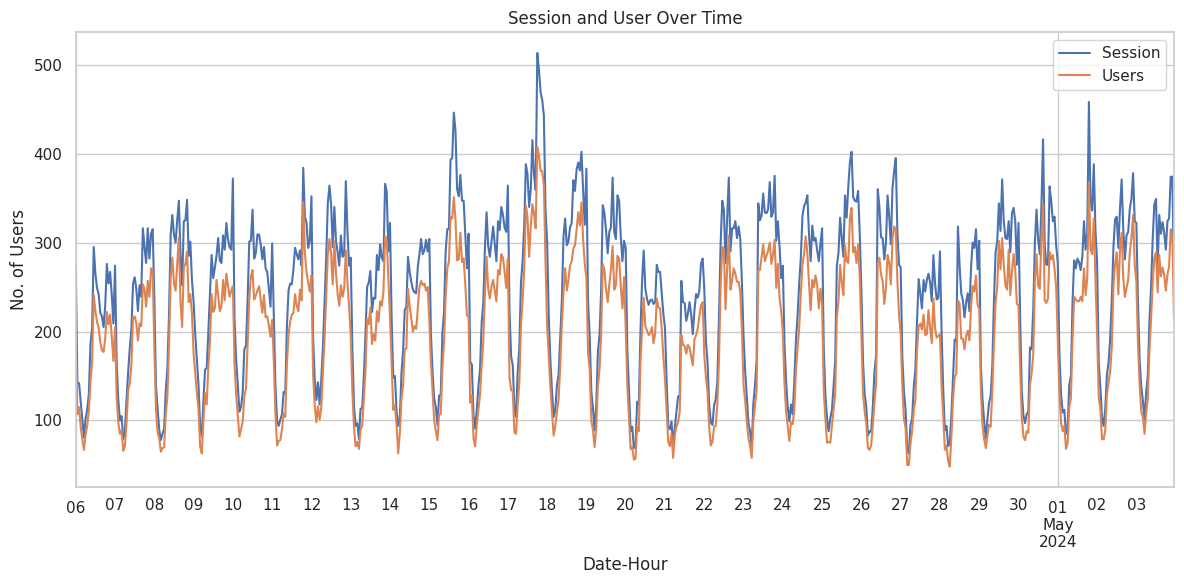

In [90]:
plt.figure(figsize=(12, 6))
df.groupby("Date-Hour")[["Session","Users"]].sum().plot(ax=plt.gca())
plt.title("Session and User Over Time")
plt.xlabel("Date-Hour")
plt.ylabel("No. of Users")
plt.grid(True)
plt.tight_layout()
plt.show()

**Q2. Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?**

**Total User By Channel**



<ipython-input-91-22a1bcb5f81d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum, palette="deep")


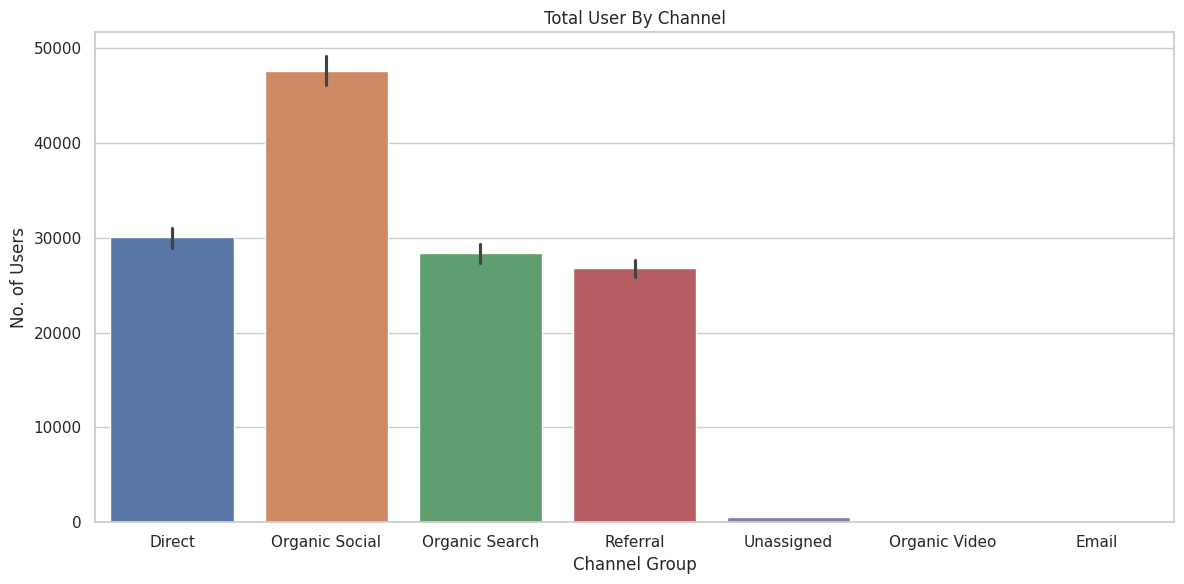

In [91]:
plt.figure(figsize=(12, 6))
# df.groupby("Chanel Group")["Users"].sum().plot(kind="bar")
sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum, palette="deep")
plt.title("Total User By Channel")
plt.xlabel("Channel Group")
plt.ylabel("No. of Users")
plt.tight_layout()
plt.show()

**Q3. Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?**

**Average Engagement Time**

<ipython-input-92-b55318f31dd8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y="Average engagement time per session", estimator=np.mean, palette="bright")


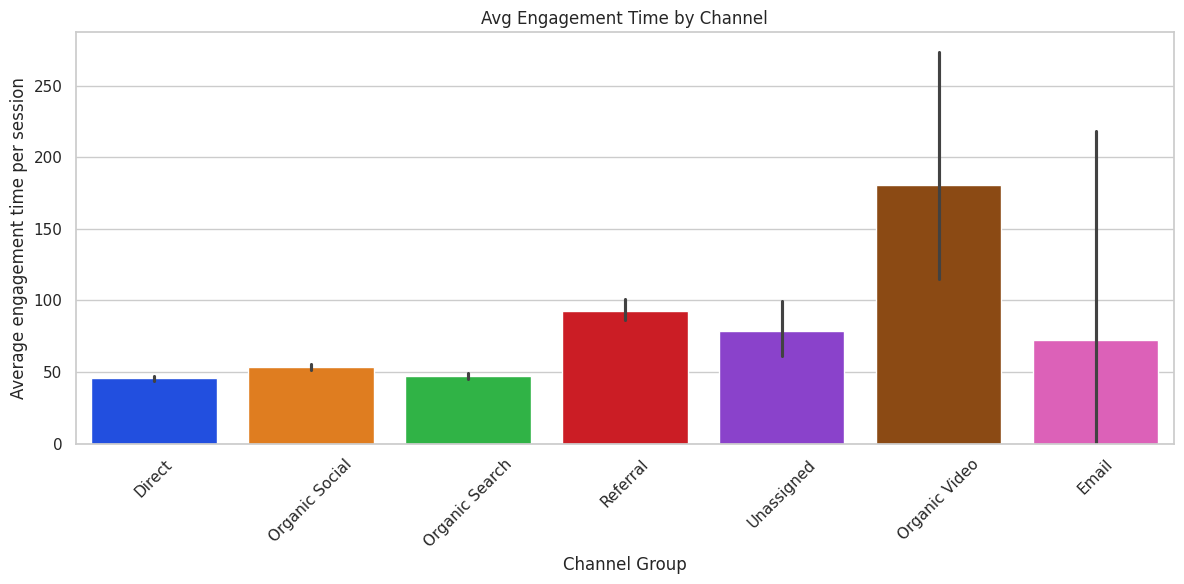

In [92]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Channel Group", y="Average engagement time per session", estimator=np.mean, palette="bright")
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q4. How does engagement rate vary across different traffic channels?**

**Engagement Rate Distribution by channel**

<ipython-input-93-5321f853631d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Channel Group", y="Engagement rate", palette="coolwarm")


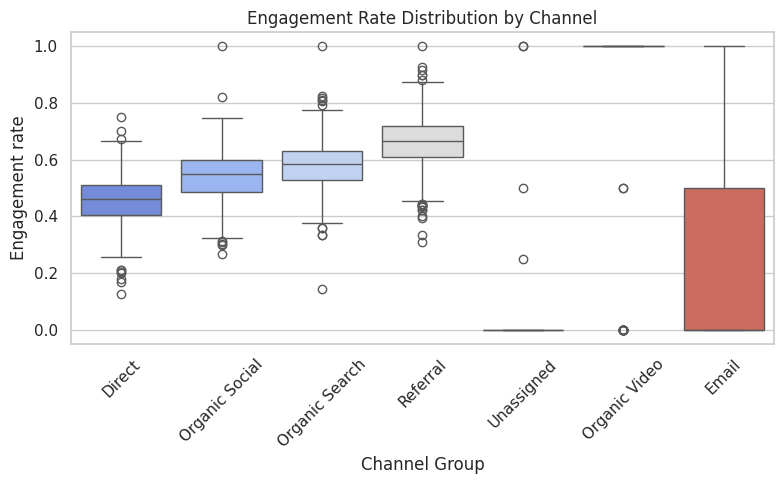

In [93]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Channel Group", y="Engagement rate", palette="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Q5. Which channels are driving more engaged sessions compared to non-engaged
ones, and what strategies can improve engagement in underperforming
channels?**

**Engaged vs non engaged sessions**

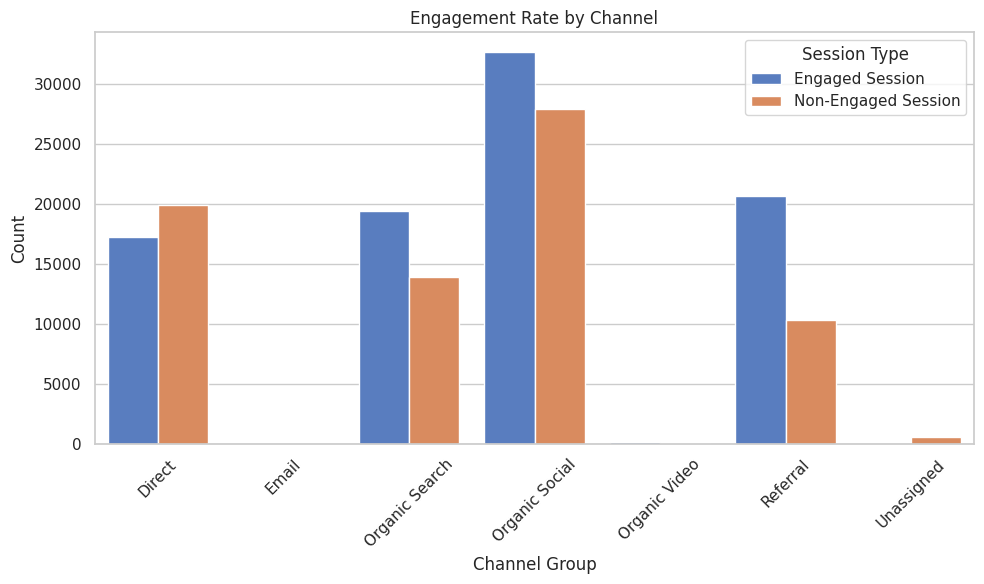

In [107]:
session_df = df.groupby("Channel Group")[["Session","Engaged Session"]].sum().reset_index()
session_df["Non-Engaged Session"] = session_df["Session"] - session_df["Engaged Session"]
session_df_melted = session_df.melt(id_vars="Channel Group", value_vars=["Engaged Session", "Non-Engaged Session"], var_name="Session Type", value_name="Count")
session_df.head()

plt.figure(figsize=(10, 6))
sns.barplot(data=session_df_melted, x="Channel Group", y="Count", hue="Session Type", palette="muted")
plt.title("Engagement Rate by Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q6. At what hours of the day does each channel drive the most traffic?**

**Traffics By Hour and Channel**

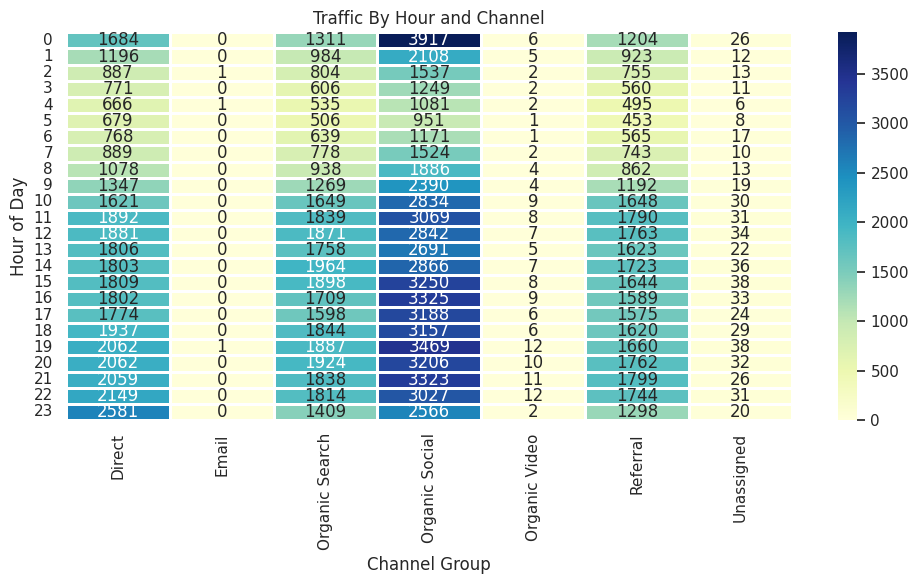

In [120]:
heatmap_data = df.groupby(["Hour", "Channel Group"])["Session"].sum().unstack().fillna(0)
heatmap_data.head()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=1)
plt.title("Traffic By Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

**Q7. Is there any correlation between high traffic (sessions) and high engagement rate over time?**

**Engagement Rate vs Session Over Time**

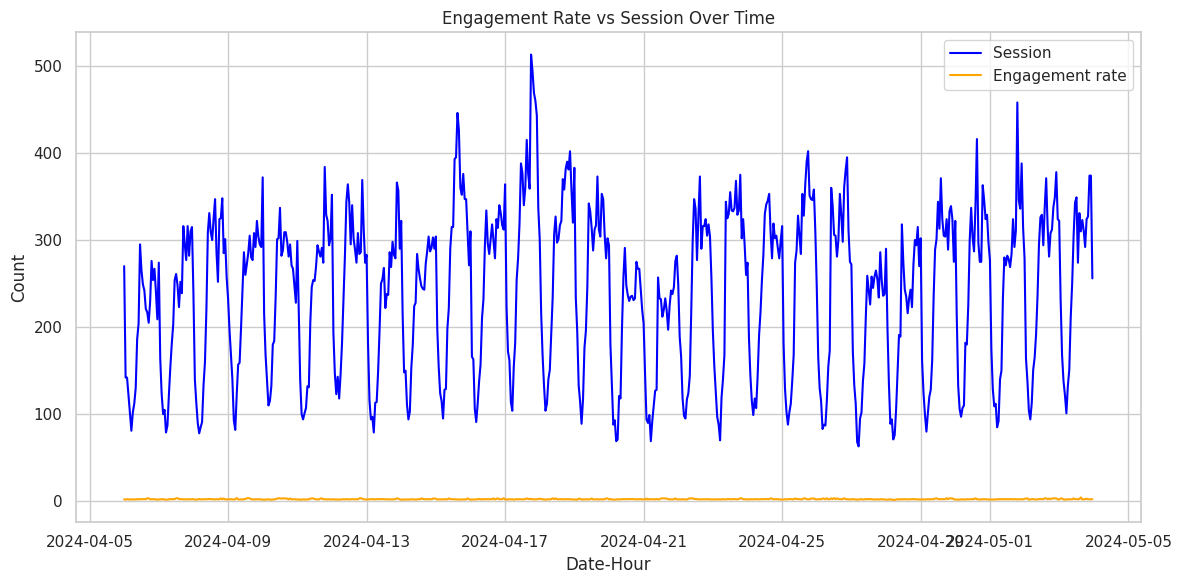

In [122]:
df_plot = df.groupby("Date-Hour")[["Session", "Engagement rate"]].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_plot["Date-Hour"], df_plot["Session"], label="Session", color="blue")
plt.plot(df_plot["Date-Hour"], df_plot["Engagement rate"], label="Engagement rate", color="orange")
plt.title("Engagement Rate vs Session Over Time")
plt.xlabel("Date-Hour")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

---
STEPS

---

🧹 1. Data Cleaning & Preparation

*   Header Correction: The original header was part of the first row. This was fixed by assigning it as column headers.
*   Data Type Fixes:
    *   "Date-Hour" converted to datetime format.
    *   Numeric fields (like "Users", "Sessions", etc.) coerced to numeric for consistency.
*   Hour Extraction: A new "Hour" column derived from the timestamp for time-based analysis.

📊 2. Trend Over Time: Sessions & Users  
📈 3. Top Marketing Channels by User Count  
⏱️ 4. Engagement Metrics by Channel  
🔥 5. Engaged vs. Non-Engaged Sessions  
⏰ 6. Hourly Traffic Heatmap  
📌 7. Engagement Rate by Channel  
